<a href="https://colab.research.google.com/github/labviros/computer-vision-topics/blob/master/lesson04-3d_object_model/read_stl3dModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Código para ler e plotar um modelo 3D STL

Antes de usar o código abaixo, temos que instalar o  `numpy-stl` como indicado abaixo. Rode apenas uma vez para instalar e isso deve ser o suficiente, a não ser que algo dê errado. 

In [1]:
!pip install numpy-stl

     |████████████████████████████████| 481kB 12.4MB/s 
  Created wheel for numpy-stl: filename=numpy_stl-2.13.0-cp36-cp36m-linux_x86_64.whl size=133507 sha256=c3d80aa9120f84f67e6f92cdc3c5f8c29f62c7e887baf0933e3c02f954f1b001
  Stored in directory: /root/.cache/pip/wheels/88/91/7e/547e38f7595910738c22d9c0bb5796dc55a71e61058f26d4bf
Successfully built numpy-stl


### Lendo, ajustando para usar como um objeto e plotando um modelo STL

O código para ler e plotar um modelo 3D STL em Python é este que está mostrado logo abaixo.

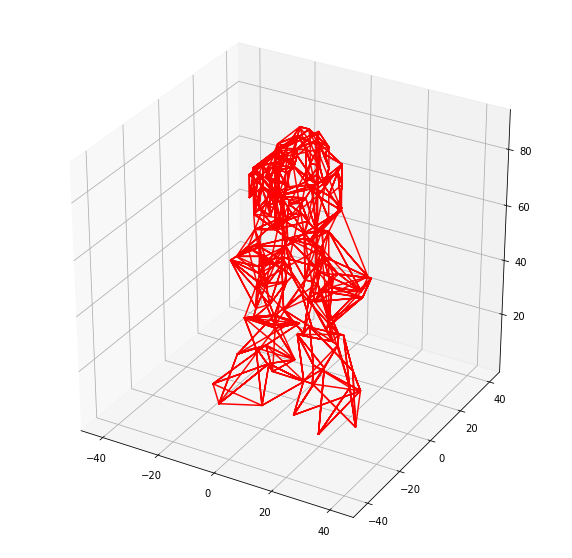

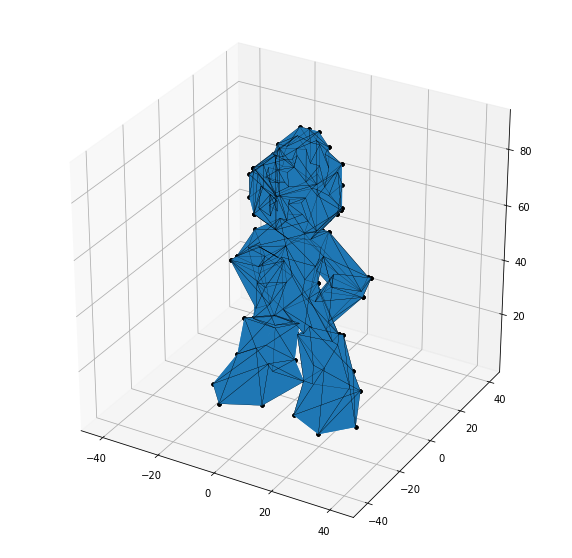

In [3]:
from stl import mesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d  
from math import pi,cos,sin

# Complementary function to make the 3D axes aspect equal 

def set_axes_equal(ax):
    #Make axes of 3D plot have equal scale so that spheres appear as spheres,
    #cubes as cubes, etc..  This is one possible solution to Matplotlib's
    #ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    #Input
    #  ax: a matplotlib axis, e.g., as output from plt.gca().
    
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])




# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('megaman.STL')

# Get the x, y, z coordinates contained in the mesh structure that are the 
# vertices of the triangular faces of the object
x = your_mesh.x.flatten()
y = your_mesh.y.flatten()
z = your_mesh.z.flatten()

# Get the vectors that define the triangular faces that form the 3D object
kong_vectors = your_mesh.vectors

# Create the 3D object from the x,y,z coordinates and add the additional array of ones to 
# represent the object using homogeneous coordinates
kong = np.array([x.T,y.T,z.T,np.ones(x.size)])

#print(kong.shape)

###################################################
# Plotting the 3D vertices of the triangular faces
###################################################

# Create a new plot
fig = plt.figure(1,figsize=[10,10])
axes0 = plt.axes(projection='3d')

# Plot the points drawing the lines
axes0.plot(kong[0,:],kong[1,:],kong[2,:],'r')
set_axes_equal(axes0)




###################################################
# Plotting the 3D triangular faces of the object
###################################################

# Create a new plot
fig = plt.figure(2,figsize=[10,10])
axes1 = plt.axes(projection='3d')

# Plot and render the faces of the object
axes1.add_collection3d(art3d.Poly3DCollection(kong_vectors))
# Plot the contours of the faces of the object
axes1.add_collection3d(art3d.Line3DCollection(kong_vectors, colors='k', linewidths=0.2, linestyles='-'))
# Plot the vertices of the object
axes1.plot(kong[0,:],kong[1,:],kong[2,:],'k.')

# Set axes and their aspect
axes1.auto_scale_xyz(kong[0,:],kong[1,:],kong[2,:])
set_axes_equal(axes1)
# Show the plots 
plt.show()



